In [1]:
import dandelion as ddl
import scanpy as sc
import warnings
import os

warnings.filterwarnings('ignore')
sc.settings.set_figure_params(dpi=80)

In [2]:
adata = sc.read("/SGRNJ06/randd/USER/cjj/celedev/dandelion/singularity/dandelion_tutorial/demo-gex.h5ad")
vdj = ddl.read_h5ddl("/SGRNJ06/randd/USER/cjj/celedev/dandelion/singularity/dandelion_tutorial/demo-vdj.h5ddl")

In [3]:
vdj, adata = ddl.pp.check_contigs(vdj, adata)

Preparing data: 6505it [00:03, 2019.58it/s]
Scanning for poor quality/ambiguous contigs: 100%|██████████| 3158/3158 [00:23<00:00, 134.07it/s]                                                      


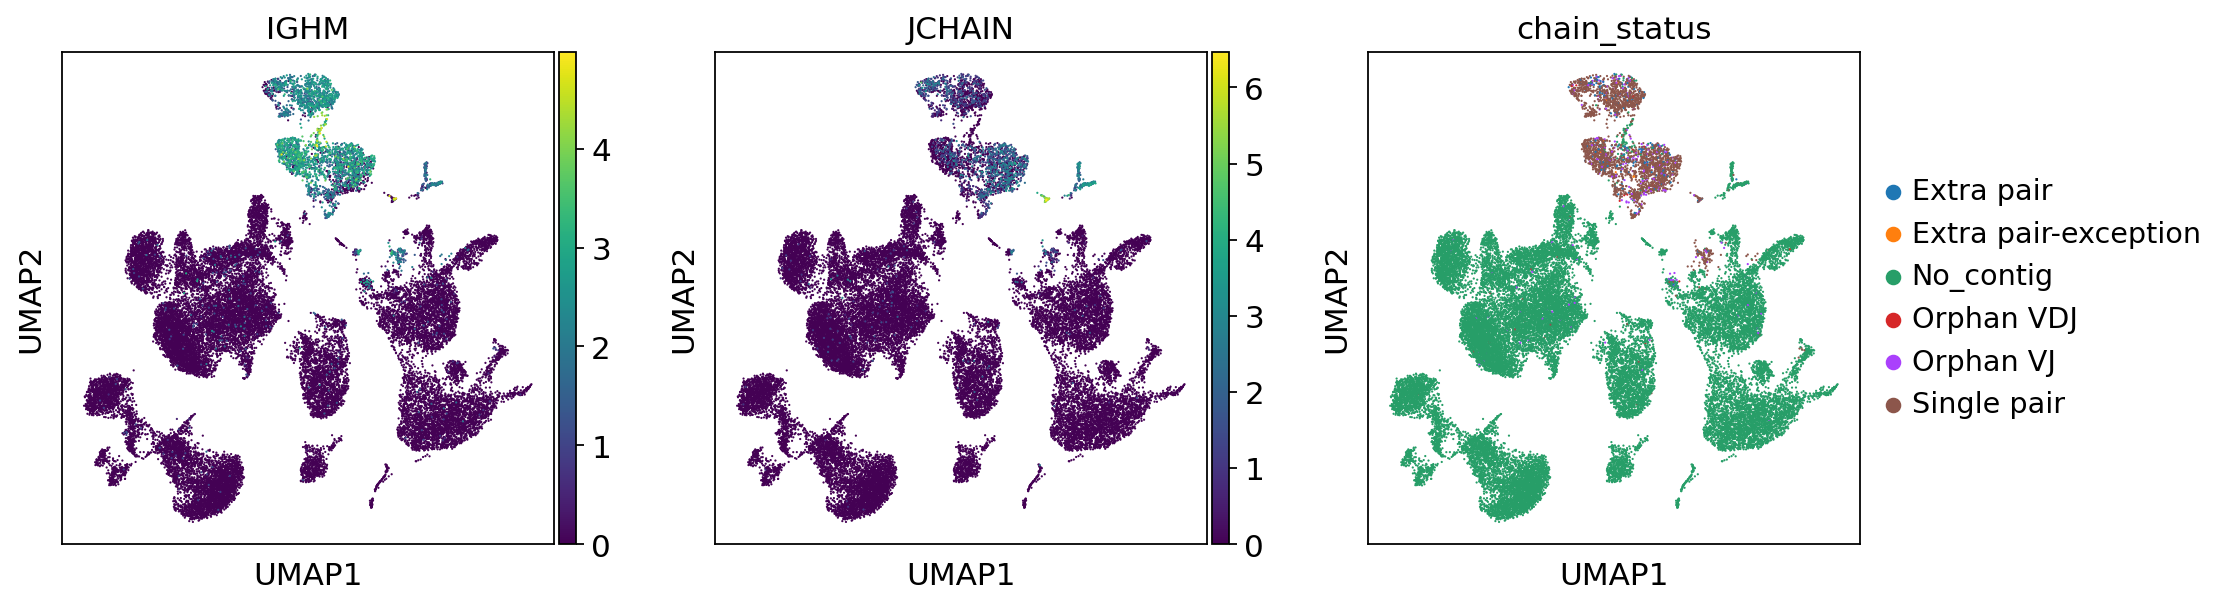

In [7]:
sc.pl.umap(adata, color=['IGHM', 'JCHAIN', 'chain_status'])

In [11]:
vdj.data.cell_id

sequence_id
sc5p_v2_hs_PBMC_10k_AAACCTGTCATATCGG_contig_1    sc5p_v2_hs_PBMC_10k_AAACCTGTCATATCGG
sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC_contig_2    sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC
sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC_contig_1    sc5p_v2_hs_PBMC_10k_AAACCTGTCCGTTGTC
sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG_contig_1    sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG
sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG_contig_2    sc5p_v2_hs_PBMC_10k_AAACCTGTCGAGAACG
                                                                 ...                 
vdj_v1_hs_pbmc3_TTTCCTCTCGACAGCC_contig_1            vdj_v1_hs_pbmc3_TTTCCTCTCGACAGCC
vdj_v1_hs_pbmc3_TTTGCGCCATACCATG_contig_2            vdj_v1_hs_pbmc3_TTTGCGCCATACCATG
vdj_v1_hs_pbmc3_TTTGCGCCATACCATG_contig_1            vdj_v1_hs_pbmc3_TTTGCGCCATACCATG
vdj_v1_hs_pbmc3_TTTGGTTGTAGGCATG_contig_2            vdj_v1_hs_pbmc3_TTTGGTTGTAGGCATG
vdj_v1_hs_pbmc3_TTTGGTTGTAGGCATG_contig_1            vdj_v1_hs_pbmc3_TTTGGTTGTAGGCATG
Name: cell_id, Length: 7357, dtype: object

In [12]:
#vdj.data.cell_id = [result of modification procedure on existing vdj.data.cell_id]
vdj.update_metadata()

In [13]:
vdj

Dandelion class object with n_obs = 3092 and n_contigs = 7357
    data: 'sequence_id', 'sequence', 'rev_comp', 'productive', 'v_call', 'd_call', 'j_call', 'sequence_alignment', 'germline_alignment', 'junction', 'junction_aa', 'v_cigar', 'd_cigar', 'j_cigar', 'stop_codon', 'vj_in_frame', 'locus', 'c_call', 'junction_length', 'np1_length', 'np2_length', 'v_sequence_start', 'v_sequence_end', 'v_germline_start', 'v_germline_end', 'd_sequence_start', 'd_sequence_end', 'd_germline_start', 'd_germline_end', 'j_sequence_start', 'j_sequence_end', 'j_germline_start', 'j_germline_end', 'v_score', 'v_identity', 'v_support', 'd_score', 'd_identity', 'd_support', 'j_score', 'j_identity', 'j_support', 'fwr1', 'fwr2', 'fwr3', 'fwr4', 'cdr1', 'cdr2', 'cdr3', 'cell_id', 'consensus_count', 'duplicate_count', 'v_call_10x', 'd_call_10x', 'j_call_10x', 'junction_10x', 'junction_10x_aa', 'j_support_igblastn', 'j_score_igblastn', 'j_call_igblastn', 'j_call_blastn', 'j_identity_blastn', 'j_alignment_length_bla

In [14]:
ddl.tl.find_clones(vdj)

Finding clones based on B cell VDJ chains : 100%|██████████| 260/260 [00:00<00:00, 1506.92it/s]                                                        
Refining clone assignment based on VJ chain pairing : 100%|██████████| 2826/2826 [00:00<00:00, 308562.06it/s]                                          


In [15]:
ddl.tl.generate_network(vdj)

Setting up data: 6238it [00:02, 2281.22it/s]
Linking edges : 100%|██████████| 2732/2732 [00:00<00:00, 14519.82it/s]                                                                                 


In [16]:
ddl.tl.clone_size(vdj)
#this makes an independent column with the provided max_size in its name
ddl.tl.clone_size(vdj, max_size = 3)

In [17]:
ddl.tl.transfer(adata, vdj)

... storing 'clone_id' as categorical


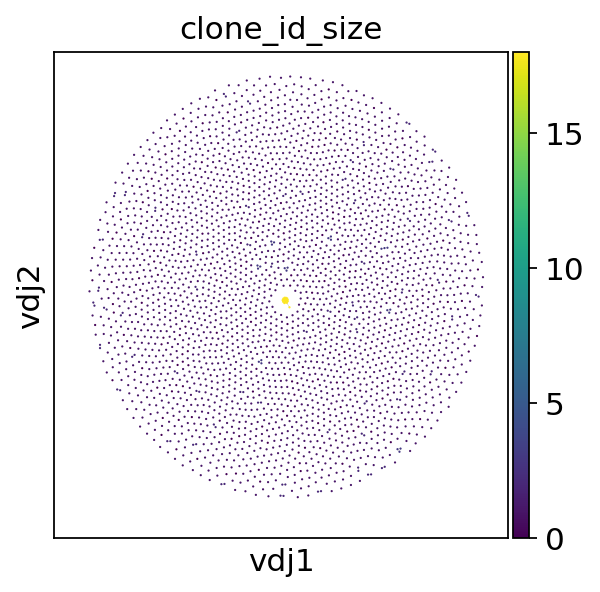

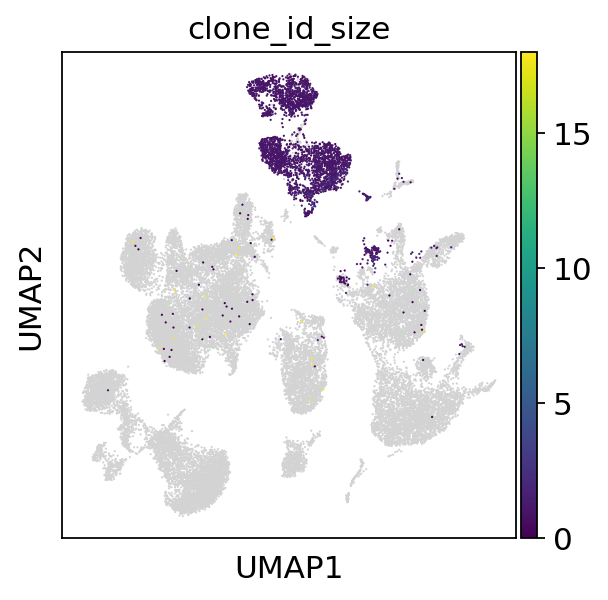

In [18]:
ddl.pl.clone_network(adata, color='clone_id_size')
sc.pl.umap(adata, color='clone_id_size')

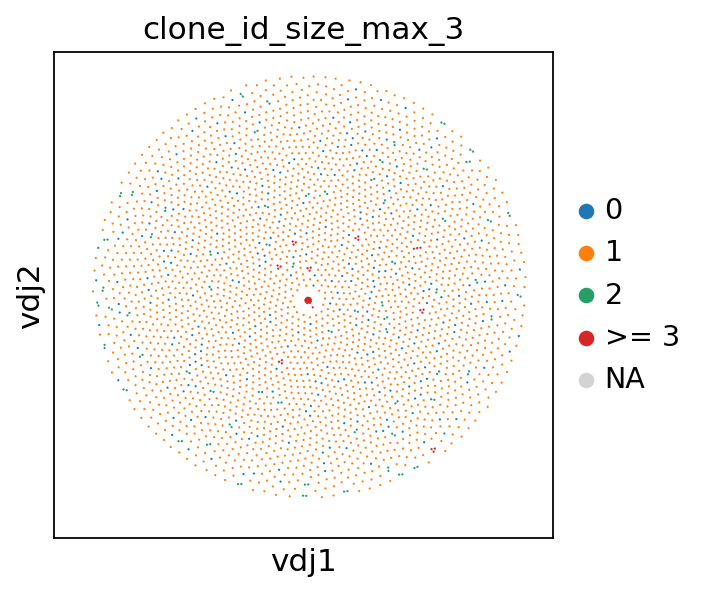

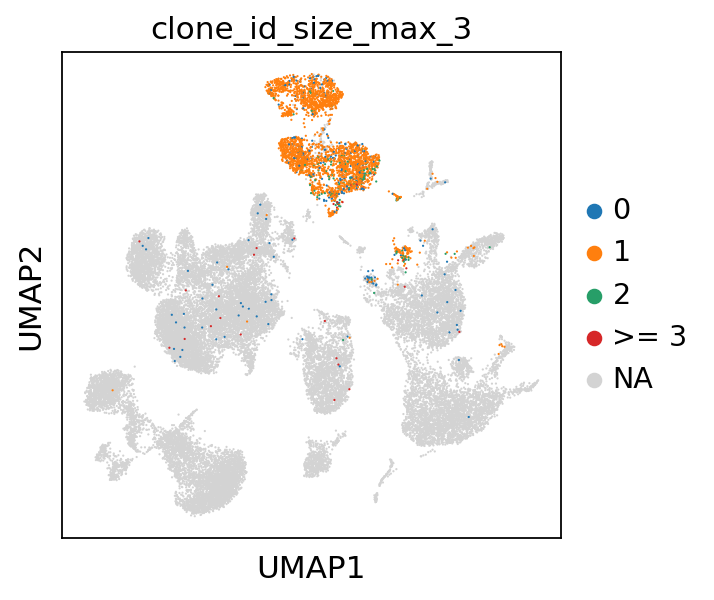

In [19]:
ddl.pl.clone_network(adata, color='clone_id_size_max_3')
sc.pl.umap(adata, color='clone_id_size_max_3')

In [20]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

(<Figure size 576x216 with 1 Axes>,
 <AxesSubplot:title={'center':'v call genotyped VDJ usage'}, ylabel='proportion'>)

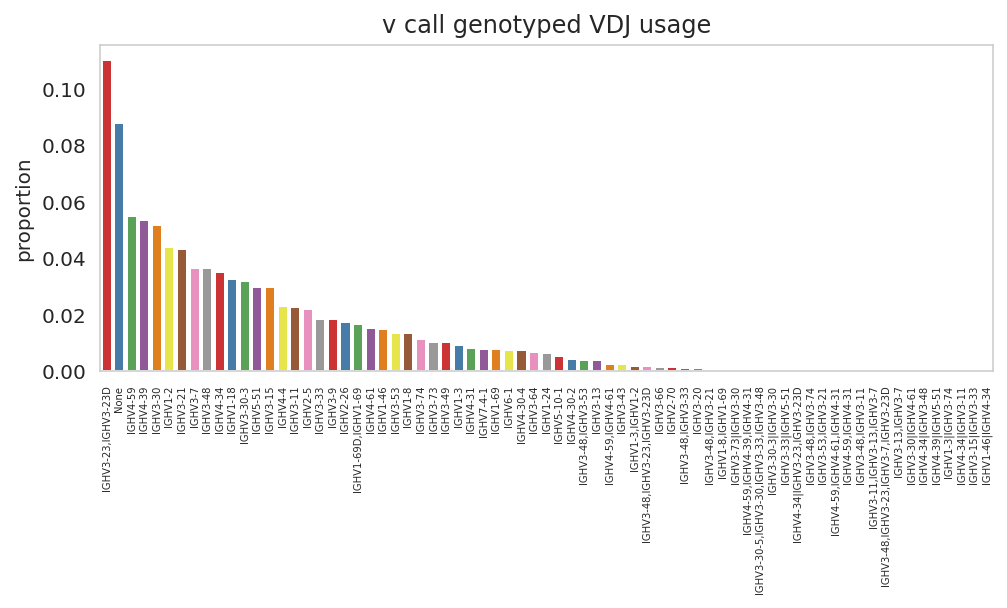

In [21]:
ddl.pl.barplot(vdj[vdj.metadata.isotype_status != 'Multi'], # remove multi from the plots
               color = 'v_call_genotyped_VDJ', xtick_fontsize = 5)

(<Figure size 576x216 with 1 Axes>,
 <AxesSubplot:title={'center':'v call genotyped VDJ usage'}, ylabel='count'>)

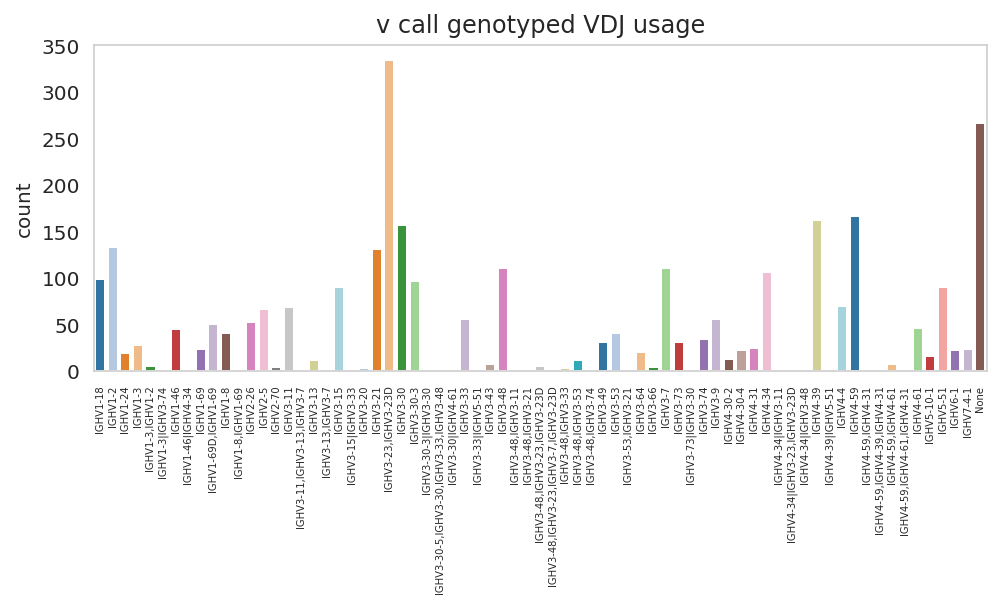

In [22]:
ddl.pl.barplot(vdj[vdj.metadata.isotype_status != 'Multi'],
               color = 'v_call_genotyped_VDJ',
               normalize = False,
               sort_descending = None,
               palette = 'tab20',
               xtick_fontsize = 5
              )

(<Figure size 288x216 with 1 Axes>,
 <AxesSubplot:title={'center':'multiple stacked bar plot : isotype status usage'}, ylabel='count'>)

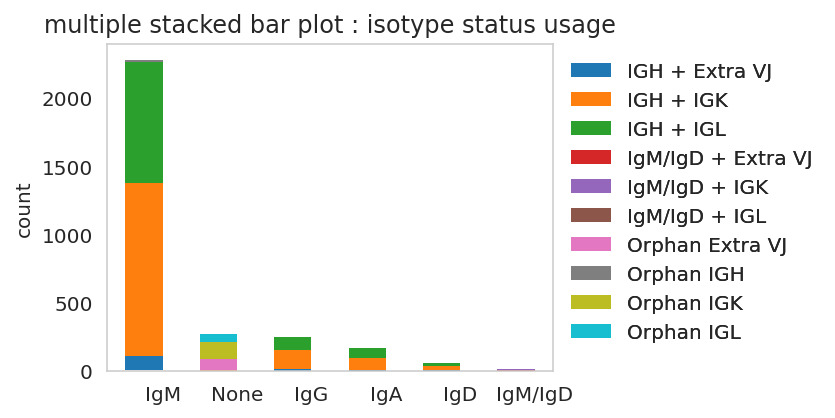

In [23]:
ddl.pl.stackedbarplot(vdj[vdj.metadata.isotype_status != 'Multi'],
                      color = 'isotype_status',
                      groupby = 'locus_status',
                      xtick_rotation = 0,
                      figsize = (4,3)
                     )

(<Figure size 576x216 with 1 Axes>,
 <AxesSubplot:title={'center':'multiple stacked bar plot : v call genotyped VDJ usage'}, ylabel='proportion'>)

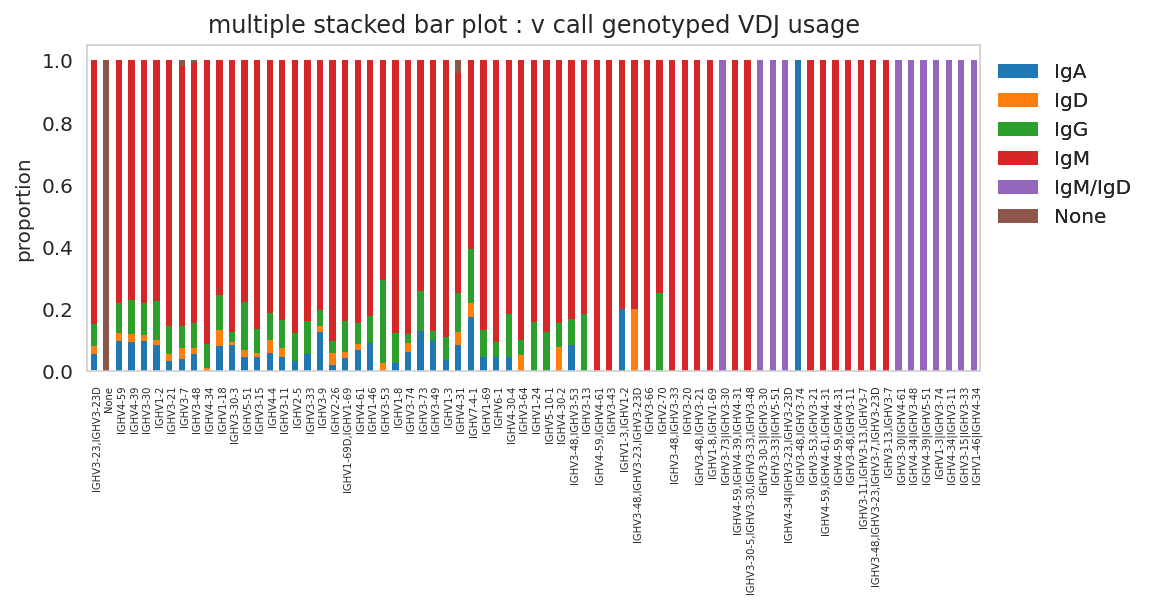

In [24]:
ddl.pl.stackedbarplot(vdj[vdj.metadata.isotype_status != 'Multi'],
                      color = 'v_call_genotyped_VDJ',
                      groupby = 'isotype_status',
                      normalize = True,
                      xtick_fontsize = 5
                     )

(<Figure size 360x216 with 1 Axes>,
 <AxesSubplot:xlabel='junction_length', ylabel='count'>)

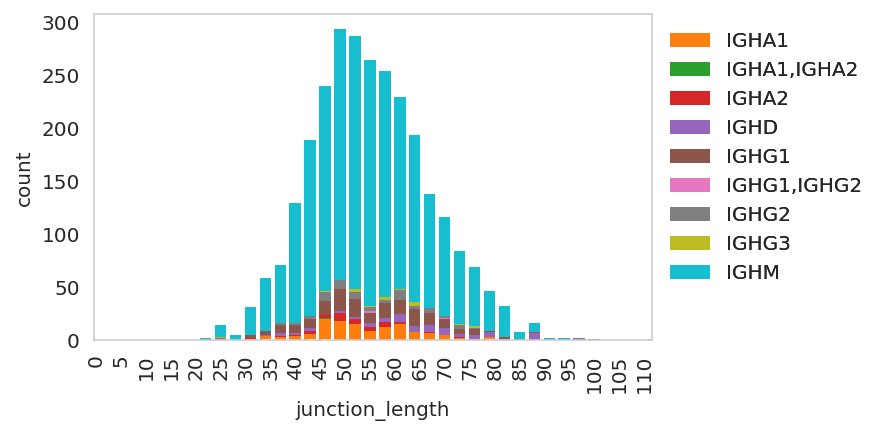

In [25]:
ddl.pl.spectratype(vdj[vdj.metadata.isotype_status != 'Multi'],
                   color = 'junction_length',
                   groupby = 'c_call',
                   locus='IGH',
                   width = 2.3
                  )

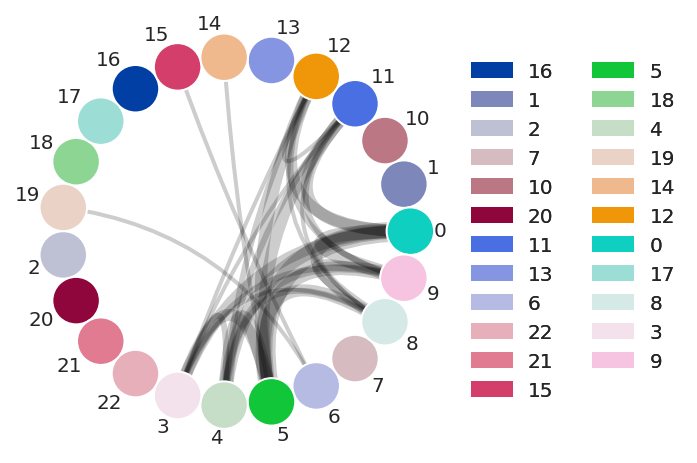

In [26]:
ddl.tl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'leiden',
                     weighted_overlap = True
                    )
ddl.pl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'leiden',
                     weighted_overlap = True
                    )

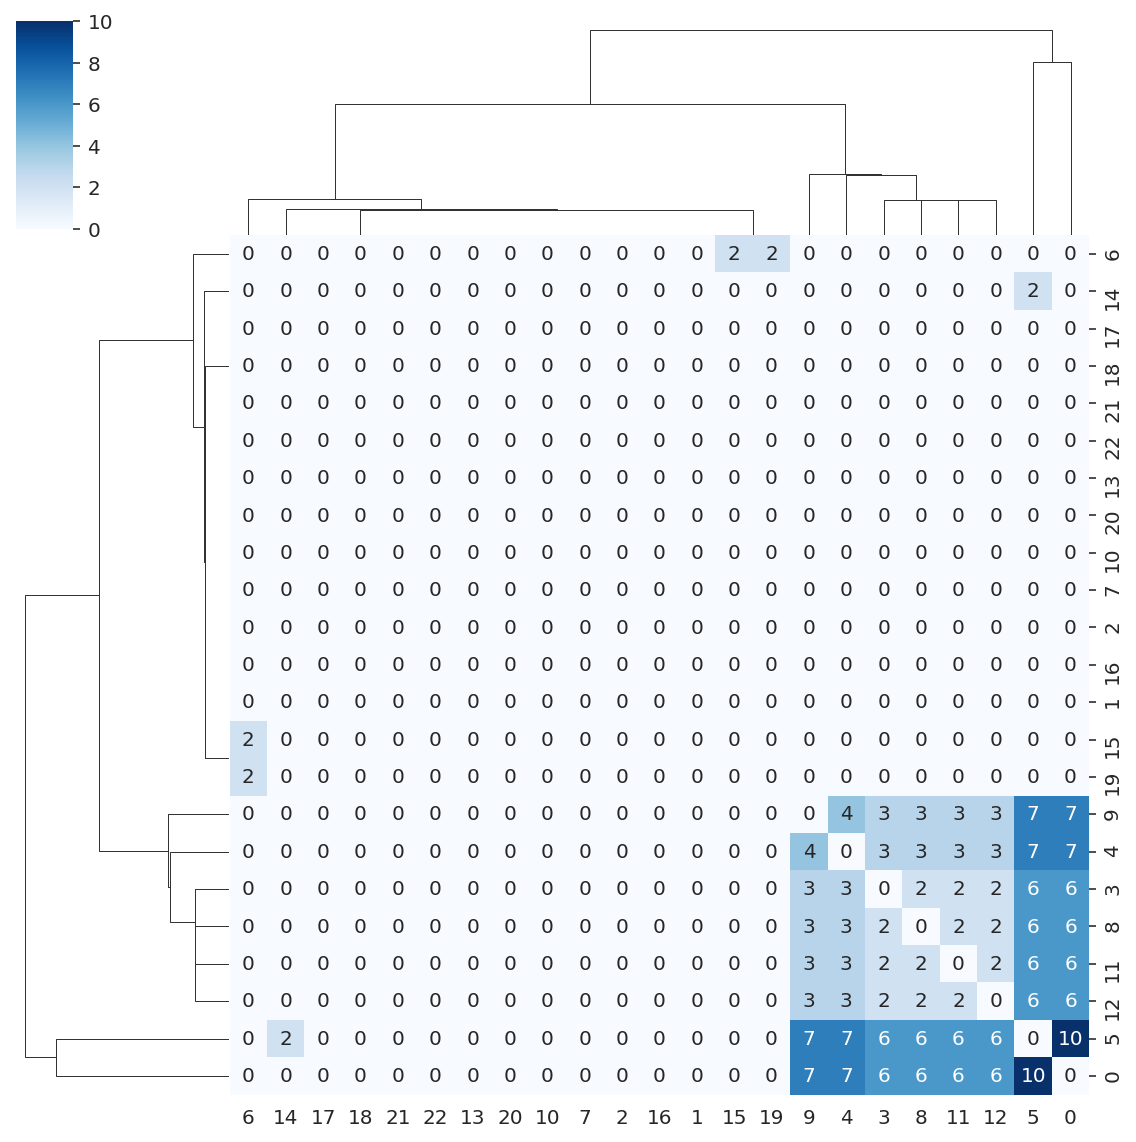

In [27]:
ddl.pl.clone_overlap(adata,
                     groupby = 'leiden',
                     colorby = 'leiden',
                     weighted_overlap = True, as_heatmap = True,
                     # seaborn clustermap kwargs
                     cmap = 'Blues', annot = True, figsize=(8,8), annot_kws={"size": 10})

In [28]:
adata.write("/SGRNJ06/randd/USER/cjj/celedev/dandelion/singularity/dandelion_tutorial/demo-gex-processed.h5ad")
vdj.write("/SGRNJ06/randd/USER/cjj/celedev/dandelion/singularity/dandelion_tutorial/demo-vdj-processed.h5ddl")